
**Problem Statement:**
Netflix wants to grow its business in different countries and wants to understand which type of movies/TV shows to produce that can help them to achieve growth and profitability.


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')
df_original=df

In [ ]:
small_df=df.head()
small_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#2. Observations on the shape of data
df.shape

(8807, 12)

In [ ]:
#1.	Defining Problem Statement and Analysing basic metrics
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df['title'].nunique()

8807

In [ ]:
df['director'].nunique()

4528

In [ ]:
#	2. data types of all the attributes
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#2.missing value detection
# Columns with null values are :'director','cast','country','date_added','rating' and 'duration'
# In order to treat missing values ;
# Here we are using the fillna() method for imputation.
# For categorical variable with null value, we will update row as :
# i)	Director> ‘Unknown Director’
# ii)	Cast>’Unknown Actor’
# iii)	Country> ‘Unknown country’
# iv)	Date Added> ‘Unknown Date added’
# v)	Rating>’Unknown rating’
# vi)Duration>'Unknown duration'

df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are a total of 4307 null values as seen above under each coloumn. We need to treat these NaN/None values using Imputation.

For continuous variable we replace zero; for Date Added having null values we have replaced with 0.


In [ ]:
df.isna().sum().sum()

4307

In [ ]:
#Imputation
df.director.fillna('Unknown Director', inplace=True)
df.cast.fillna('Unknown Actor', inplace=True)
df.country.fillna('Unknown Country', inplace=True)
df.date_added.fillna(0, inplace=True)
df.rating.fillna('Unknown Rating', inplace=True)
df.duration.fillna('Unknown Duration', inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.isna().sum().sum()
#All null values have been updated according to our imputation

0

In [ ]:
#Next we have to unnest the coloumns with nested data.
#First we check each colomn suspected of nested data.
#Cast
df[df.cast.apply(lambda x: "," in str(x))]
#There are nested values in case

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown Country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#Unnesting cast coloumn
def split_my_str(inp):
    return str(inp).split(', ')
df.cast.apply(split_my_str)

0                                         [Unknown Actor]
1       [Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...
2       [Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...
3                                         [Unknown Actor]
4       [Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...
                              ...                        
8802    [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...
8803                                      [Unknown Actor]
8804    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...
8805    [Tim Allen, Courteney Cox, Chevy Chase, Kate M...
8806    [Vicky Kaushal, Sarah-Jane Dias, Raaghav Chana...
Name: cast, Length: 8807, dtype: object

In [ ]:
df['cast'] = df.cast.apply(split_my_str)

In [ ]:
df[df.country.apply(lambda x: "," in str(x))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
12,s13,Movie,Je Suis Karl,Christian Schwochow,"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
29,s30,Movie,Paranoia,Robert Luketic,"[Liam Hemsworth, Gary Oldman, Amber Heard, Har...","United States, India, France","September 19, 2021",2013,PG-13,106 min,Thrillers,"Blackmailed by his company's CEO, a low-level ..."
38,s39,Movie,Birth of the Dragon,George Nolfi,"[Billy Magnussen, Ron Yuan, Qu Jingjing, Terry...","China, Canada, United States","September 16, 2021",2017,PG-13,96 min,"Action & Adventure, Dramas",A young Bruce Lee angers kung fu traditionalis...
46,s47,Movie,Safe House,Daniel Espinosa,"[Denzel Washington, Ryan Reynolds, Vera Farmig...","South Africa, United States, Japan","September 16, 2021",2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...
...,...,...,...,...,...,...,...,...,...,...,...,...
8788,s8789,Movie,You Carry Me,Ivona Juka,"[Lana Baric, Vojislav Brajovic, Natasa Janjic,...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art..."
8794,s8795,Movie,اشتباك,Mohamed Diab,"[Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahm...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown Director,"[Mike Liscio, Emily Bauer, Billy Bob Thompson,...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8797,s8798,TV Show,Zak Storm,Unknown Director,"[Michael Johnston, Jessica Gee-George, Christi...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...


In [ ]:
#unnesting Country
def split_my_str(inp):
    return str(inp).split(', ')
df.country.apply(split_my_str)

0         [United States]
1          [South Africa]
2       [Unknown Country]
3       [Unknown Country]
4                 [India]
              ...        
8802      [United States]
8803    [Unknown Country]
8804      [United States]
8805      [United States]
8806              [India]
Name: country, Length: 8807, dtype: object

In [ ]:
df['country'] = df.country.apply(split_my_str)

In [ ]:
df[df.director.apply(lambda x: "," in str(x))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsden,...",[Unknown Country],"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
16,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",[Unknown Actor],[Unknown Country],"September 22, 2021",2020,TV-MA,67 min,"Documentaries, International Movies",Declassified documents reveal the post-WWII li...
23,s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","[Maisie Benson, Paul Killam, Kerry Gudjohnsen,...",[Unknown Country],"September 21, 2021",2021,TV-Y,61 min,Children & Family Movies,From arcade games to sled days and hiccup cure...
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","[Abhishek Banerjee, Rinku Rajguru, Delzad Hiwa...",[Unknown Country],"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so..."
68,s69,Movie,Schumacher,"Hanns-Bruno Kammertöns, Vanessa Nöcker, Michae...",[Michael Schumacher],[Unknown Country],"September 15, 2021",2021,TV-14,113 min,"Documentaries, International Movies, Sports Mo...",Through exclusive interviews and archival foot...
...,...,...,...,...,...,...,...,...,...,...,...,...
8727,s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",[Unknown Actor],"[United Kingdom, India, United States]","December 25, 2016",2013,NR,75 min,"Documentaries, International Movies",A small-town taxi driver is arranged to be mar...
8728,s8729,Movie,When Two Worlds Collide,"Heidi Brandenburg, Mathew Orzel",[Unknown Actor],"[Peru, United States, United Kingdom]","November 30, 2016",2016,TV-14,103 min,"Documentaries, International Movies",This documentary takes a hard look at how indi...
8737,s8738,Movie,Why Are We Getting So Fat?,"Milla Harrison-Hansley, Alicky Sussman",[Giles Yeo],[United Kingdom],"February 1, 2019",2016,TV-14,50 min,Documentaries,A Cambridge geneticist dispels misconceptions ...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",[Unknown Actor],[United States],"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...


In [ ]:
#unnesting director
def split_my_str(inp):
    return str(inp).split(', ')
df.director.apply(split_my_str)

0        [Kirsten Johnson]
1       [Unknown Director]
2        [Julien Leclercq]
3       [Unknown Director]
4       [Unknown Director]
               ...        
8802       [David Fincher]
8803    [Unknown Director]
8804     [Ruben Fleischer]
8805        [Peter Hewitt]
8806         [Mozez Singh]
Name: director, Length: 8807, dtype: object

In [ ]:
df['director'] = df.director.apply(split_my_str)

In [ ]:
df[df.listed_in.apply(lambda x: "," in str(x))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,[Unknown Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown Country],"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[Unknown Director],[Unknown Actor],[Unknown Country],"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[Unknown Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,[Mike Flanagan],"[Kate Siegel, Zach Gilford, Hamish Linklater, ...",[Unknown Country],"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...",[United States],"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,[Unknown Director],[Unknown Actor],[Unknown Country],"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Stone,...",[United States],"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kate M...",[United States],"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
#unnesting listed_in
def split_my_str(inp):
    return str(inp).split(', ')
df.listed_in.apply(split_my_str)

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object

In [ ]:
df['listed_in'] = df.listed_in.apply(split_my_str)

In [ ]:
df[df.rating.apply(lambda x: "," in str(x))]
#Rating has no nested values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],[Unknown Actor],[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,[Unknown Director],"[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Mysteries]","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown Country],"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV Ac...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,[Unknown Director],[Unknown Actor],[Unknown Country],"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,[Unknown Director],"[Mayur More, Jitendra Kumar, Ranjan Raj, Alam ...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, TV...",In a city of coaching centers known to train I...


In [ ]:
df=df.explode('country')

In [ ]:
df=df.explode('cast')

In [ ]:
df=df.explode('director')

In [ ]:
df=df.explode('listed_in')

In [ ]:
#Final Data ready for analysis
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
#3. Non-Graphical Analysis:  Let's count titles for each category for our analysis by grouping by that category
df.groupby('type')['title'].nunique()

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

In [ ]:
df.groupby('director')['title'].nunique().sort_values(ascending=False)

director
Unknown Director           2634
Rajiv Chilaka                22
Jan Suter                    21
Raúl Campos                  19
Marcus Raboy                 16
                           ... 
Brandon Camp                  1
Juan Antin                    1
Juan Antonio de la Riva       1
Juan Camilo Pinzon            1
María Jose Cuevas             1
Name: title, Length: 4994, dtype: int64

In [ ]:
df.groupby('country')['title'].nunique().sort_values(ascending=False)

country
United States      3689
India              1046
Unknown Country     831
United Kingdom      804
Canada              445
                   ... 
Somalia               1
Mongolia              1
Ecuador               1
East Germany          1
Ethiopia              1
Name: title, Length: 128, dtype: int64

In [ ]:
df.groupby('listed_in')['director'].nunique().sort_values(ascending=False)

listed_in
International Movies            2219
Dramas                          2034
Comedies                        1394
Documentaries                    859
Independent Movies               787
Action & Adventure               705
Thrillers                        541
Children & Family Movies         538
Romantic Movies                  531
Music & Musicals                 348
Horror Movies                    337
Sci-Fi & Fantasy                 253
Sports Movies                    224
Stand-Up Comedy                  193
International TV Shows           165
LGBTQ Movies                     106
TV Dramas                         92
Classic Movies                    92
Crime TV Shows                    81
Anime Features                    79
Docuseries                        76
Cult Movies                       73
Faith & Spirituality              63
TV Comedies                       54
Movies                            36
Romantic TV Shows                 31
TV Shows                    

In [ ]:
df.groupby('type')['director'].nunique()

type
Movie      4778
TV Show     300
Name: director, dtype: int64

In [ ]:
df.groupby('country')['director'].nunique().sort_values(ascending=False)

country
United States         2305
India                  736
United Kingdom         516
Unknown Country        373
France                 331
                      ... 
Latvia                   1
Liechtenstein            1
Sri Lanka                1
Sudan                    1
Dominican Republic       1
Name: director, Length: 128, dtype: int64

In [ ]:
df.groupby('cast')['title'].nunique().sort_values(ascending=False)

cast
Unknown Actor       825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
                   ... 
Jamie Lee             1
Jamie Kenna           1
Jamie Kaler           1
Jamie Johnston        1
Ṣọpẹ́ Dìrísù          1
Name: title, Length: 36440, dtype: int64

In [ ]:
df.groupby('listed_in')['title'].nunique().sort_values(ascending=False)

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

In [ ]:
df.groupby('release_year')['title'].nunique().sort_values(ascending=False)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1961       1
1947       1
1966       1
1925       1
Name: title, Length: 74, dtype: int64

In [ ]:
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df['Year Added on Netflix']=df.date_added.dt.year

In [ ]:
df['Month Added on Netflix']=df.date_added.dt.month

In [ ]:
df['Week Added on Netflix']=df.date_added.dt.week

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year Added on Netflix,Month Added on Netflix,Week Added on Netflix
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9,38
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9,38
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,38


In [ ]:
df.groupby('Year Added on Netflix')['title'].nunique().sort_values(ascending=False)

Year Added on Netflix
2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
1970      10
2012       3
2008       2
2009       2
2010       1
Name: title, dtype: int64

In [ ]:
df.groupby('Month Added on Netflix')['title'].nunique().sort_values(ascending=False)

Month Added on Netflix
7     827
12    813
9     770
4     764
10    760
8     755
1     748
3     742
6     728
11    705
5     632
2     563
Name: title, dtype: int64

In [ ]:
df.groupby('Week Added on Netflix')['title'].nunique().sort_values(ascending=False)

Week Added on Netflix
1     382
44    318
40    287
31    268
26    268
35    263
9     254
13    250
27    240
18    234
5     208
22    206
48    199
50    189
37    183
14    173
39    166
24    164
11    163
16    160
30    160
17    154
33    153
15    152
23    151
7     147
34    143
25    143
36    142
29    140
49    140
38    139
51    137
42    135
10    135
46    134
52    132
20    131
28    130
32    122
47    120
21    117
41    116
43    116
19    116
3     113
8     110
12    109
2     108
53    104
45     98
6      97
4      88
Name: title, dtype: int64

In [ ]:
df.groupby('Week Added on Netflix')['title'].nunique().sort_values(ascending=False)

Week Added on Netflix
1     382
44    318
40    287
31    268
26    268
35    263
9     254
13    250
27    240
18    234
5     208
22    206
48    199
50    189
37    183
14    173
39    166
24    164
11    163
16    160
30    160
17    154
33    153
15    152
23    151
7     147
34    143
25    143
36    142
29    140
49    140
38    139
51    137
42    135
10    135
46    134
52    132
20    131
28    130
32    122
47    120
21    117
41    116
43    116
19    116
3     113
8     110
12    109
2     108
53    104
45     98
6      97
4      88
Name: title, dtype: int64

In [ ]:
df['Difference of dates']=df['Year Added on Netflix']-df['release_year']
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year Added on Netflix,Month Added on Netflix,Week Added on Netflix,Difference of dates
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,38,1
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,38,0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9,38,0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9,38,0
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,38,0


In [ ]:
df['Difference of dates'].mode()

0    0
Name: Difference of dates, dtype: int64

In [ ]:
df['Year Added on Netflix'].mode()

0    2019
Name: Year Added on Netflix, dtype: int64

In [ ]:
#b. For graphical analysis:
import seaborn as sns


In [ ]:
df_plot=df.groupby('type')['title'].nunique()
df_plot=df_plot.reset_index()
df_plot

,type,title
0,Movie,6131
1,TV Show,2676


Text(0.5, 1.0, 'Count of number of movies and TV Shows')

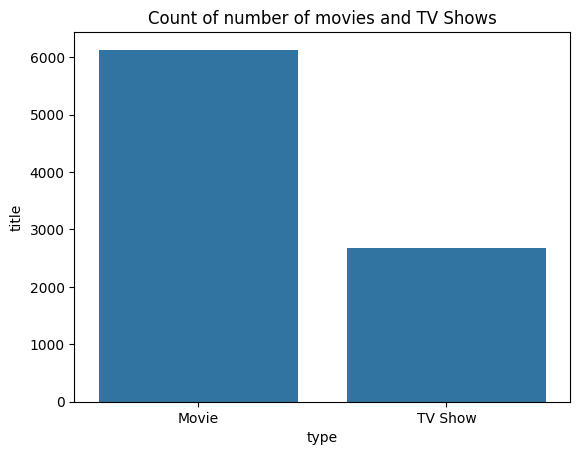

In [ ]:
sns.barplot(data = df_plot, x = 'type',y='title')
#There are around 6131 movies in the dataset on netflix
plt.title("Count of number of movies and TV Shows")

**Inference:**
There are 6131 movies and 2676 TV shows that are in the data set implying that Netflix has added significantly more movies than TV shows.


In [ ]:
df_plot=df.groupby('type')['title'].nunique()
df_plot

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

In [ ]:
df_plot2=df[df['country']!='Unknown Country']
df_plot2=df_plot2[df_plot2['type']=='Movie']
df_plot2=df_plot2.groupby('country')['title'].nunique().sort_values(ascending=False)
df_plot2=df_plot2.reset_index()
df_plot2

,country,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
...,...,...
117,Nicaragua,1
118,Palestine,1
119,Panama,1
120,Paraguay,1


In [ ]:
df_plot2['country'][:10]

0     United States
1             India
2    United Kingdom
3            Canada
4            France
5           Germany
6             Spain
7             Japan
8             China
9            Mexico
Name: country, dtype: object

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of Movies Country wise')

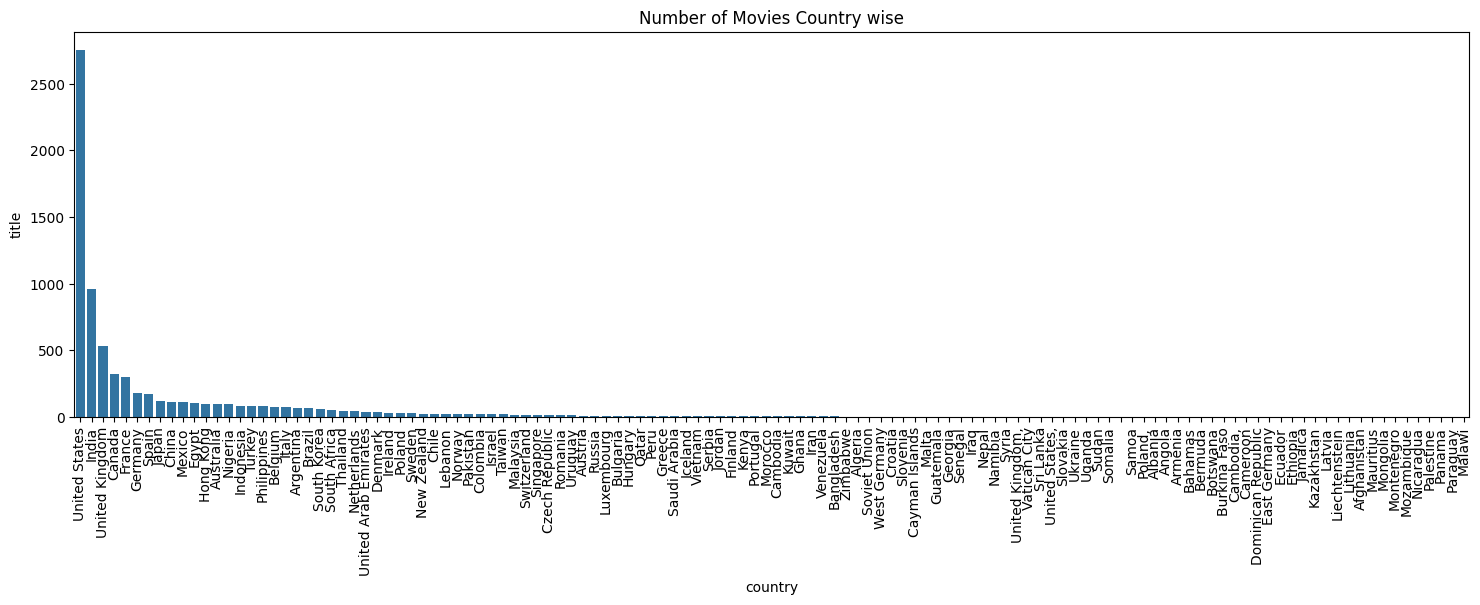

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(data = df_plot2, x = 'country',y='title',order=df_plot2['country'])
plt.xticks(rotation=90)
plt.title("Number of Movies Country wise")

Text(0.5, 1.0, 'Top 10 countries Based on number of movies produced')

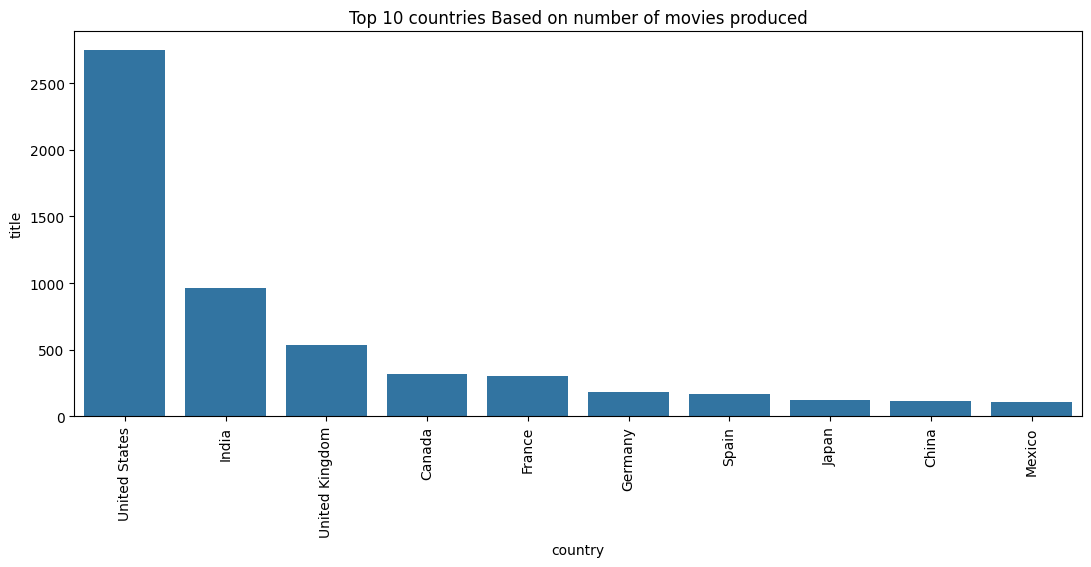

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(data = df_plot2, x = 'country',y='title',order=df_plot2['country'][:10])
plt.xticks(rotation=90)
plt.title("Top 10 countries Based on number of movies produced")

**Inference:**
Based on the graph the maximum number of movies are produced in United States,followed by India and United Kingdom.
The graph shows the top 10 countries for movie production.


In [ ]:
df_plot2_1=df[df['country']!='Unknown Country']
df_plot2_1=df_plot2_1.groupby(['country','listed_in'])['title'].nunique().sort_values(ascending=False)
df_plot2_1=df_plot2_1.reset_index()
df_plot2_1

,country,listed_in,title
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,511
...,...,...,...
1417,Mauritius,International TV Shows,1
1418,Mauritius,TV Dramas,1
1419,Mexico,Classic Movies,1
1420,Mexico,Faith & Spirituality,1


In [ ]:
df_plot2_TV=df[df['country']!='Unknown Country']
df_plot2_TV=df_plot2_TV[df_plot2_TV['type']=='TV Show']
df_plot2_TV=df_plot2_TV.groupby('country')['title'].nunique().sort_values(ascending=False)
df_plot2_TV=df_plot2_TV.reset_index()
df_plot2_TV

,country,title
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
...,...,...
61,Switzerland,1
62,Hungary,1
63,Malta,1
64,Senegal,1


Text(0.5, 1.0, 'Number of TV Shows Country wise')

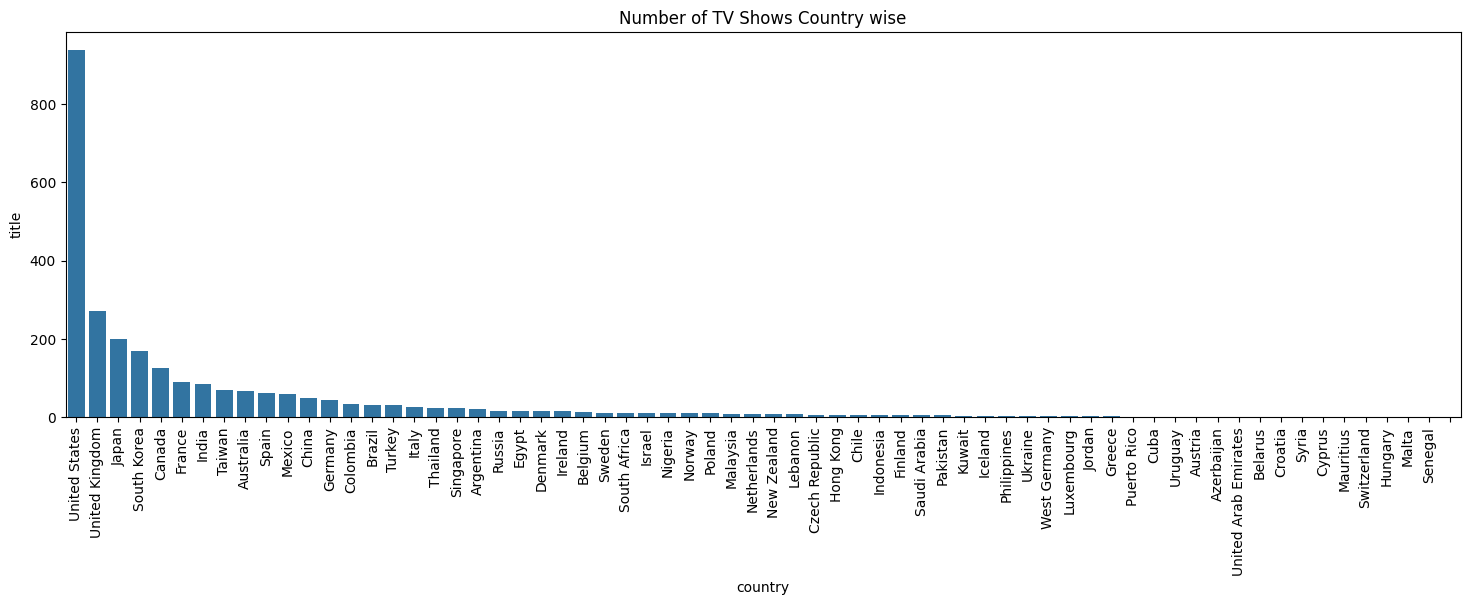

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(data = df_plot2_TV, x = 'country',y='title',order=df_plot2_TV['country'])
plt.xticks(rotation=90)
plt.title("Number of TV Shows Country wise")

**Inference:**
Based on the graph the maximum number of movies are produced in United States,followed by India and United Kingdom.
The graph shows the top 10 countries for movie production.


Text(0.5, 1.0, 'Top 10 countries Based on TV shows')

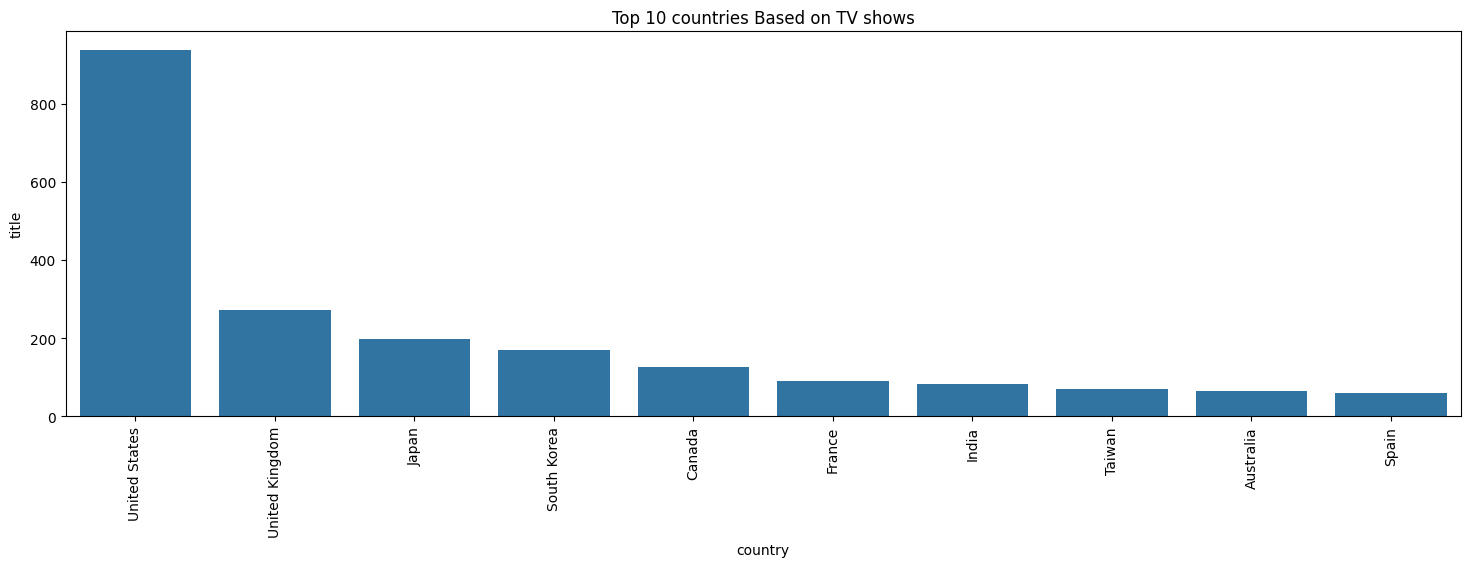

In [ ]:
plt.figure(figsize=(18,5))
sns.barplot(data = df_plot2_TV, x = 'country',y='title',order=df_plot2_TV['country'][:10])
plt.xticks(rotation=90)
plt.title("Top 10 countries Based on TV shows")

In [ ]:
df_plot3=df[df['director']!='Unknown Director']
df_plot3=df_plot3.groupby(['director','type'])['title'].nunique().sort_values(ascending=False)
df_plot3=df_plot3.reset_index()
df_plot3.head(40)

,director,type,title
0,Rajiv Chilaka,Movie,22
1,Jan Suter,Movie,21
2,Raúl Campos,Movie,19
3,Suhas Kadav,Movie,16
4,Jay Karas,Movie,15
5,Marcus Raboy,Movie,15
6,Cathy Garcia-Molina,Movie,13
7,Martin Scorsese,Movie,12
8,Jay Chapman,Movie,12
9,Youssef Chahine,Movie,12


In [ ]:
df_plot3.groupby('director')['title'].nunique().sum()

4993

Text(0.5, 1.0, 'Number of Movies/TV shows Director wise')

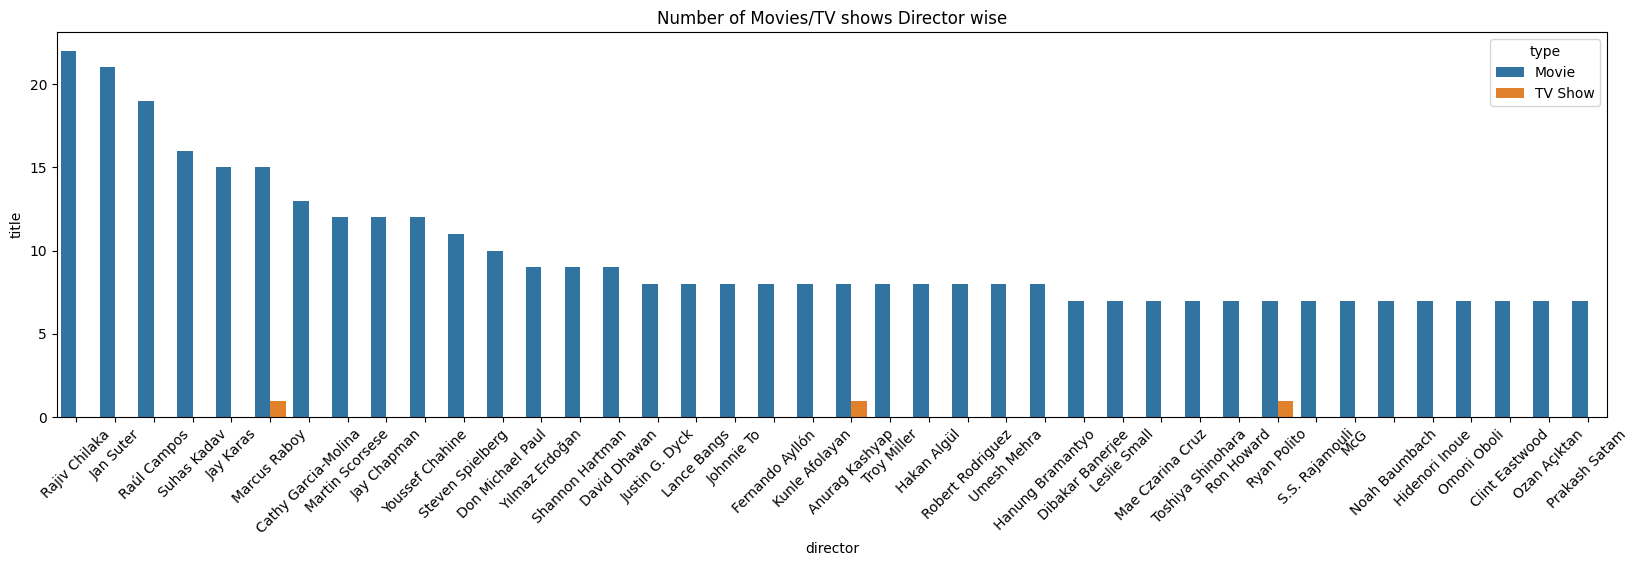

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data = df_plot3, x = 'director',y='title',order=df_plot3['director'][:40],hue='type')
plt.xticks(rotation=45)
plt.title("Number of Movies/TV shows Director wise")

Text(0.5, 1.0, 'Top 10 directors Based on Movies/TV shows')

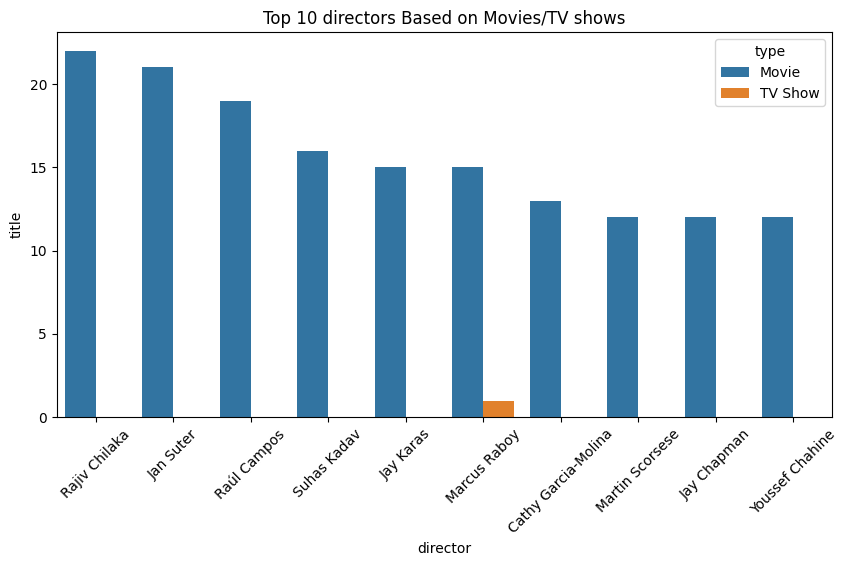

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data = df_plot3, x = 'director',y='title',hue='type',order=df_plot3['director'][:10])
plt.xticks(rotation=45)
plt.title("Top 10 directors Based on Movies/TV shows")

**Inference:**
The director that has done maximum movies/Tv shows is Rajiv Chilaka.
The graph shows the top 10 directors that have done maximum movies/Tv shows.


In [ ]:
df_plot3['director'][:10]

0          Rajiv Chilaka
1              Jan Suter
2            Raúl Campos
3            Suhas Kadav
4           Marcus Raboy
5              Jay Karas
6    Cathy Garcia-Molina
7        Youssef Chahine
8            Jay Chapman
9        Martin Scorsese
Name: director, dtype: object

In [ ]:

df_plot4=df.groupby(['listed_in','type'])['title'].nunique().sort_values(ascending=False)
df_plot4=df_plot4.reset_index()
df_plot4

,listed_in,type,title
0,International Movies,Movie,2752
1,Dramas,Movie,2427
2,Comedies,Movie,1674
3,International TV Shows,TV Show,1351
4,Documentaries,Movie,869
5,Action & Adventure,Movie,859
6,TV Dramas,TV Show,763
7,Independent Movies,Movie,756
8,Children & Family Movies,Movie,641
9,Romantic Movies,Movie,616


Text(0.5, 1.0, 'Number of Movies/TV shows based on their Genre')

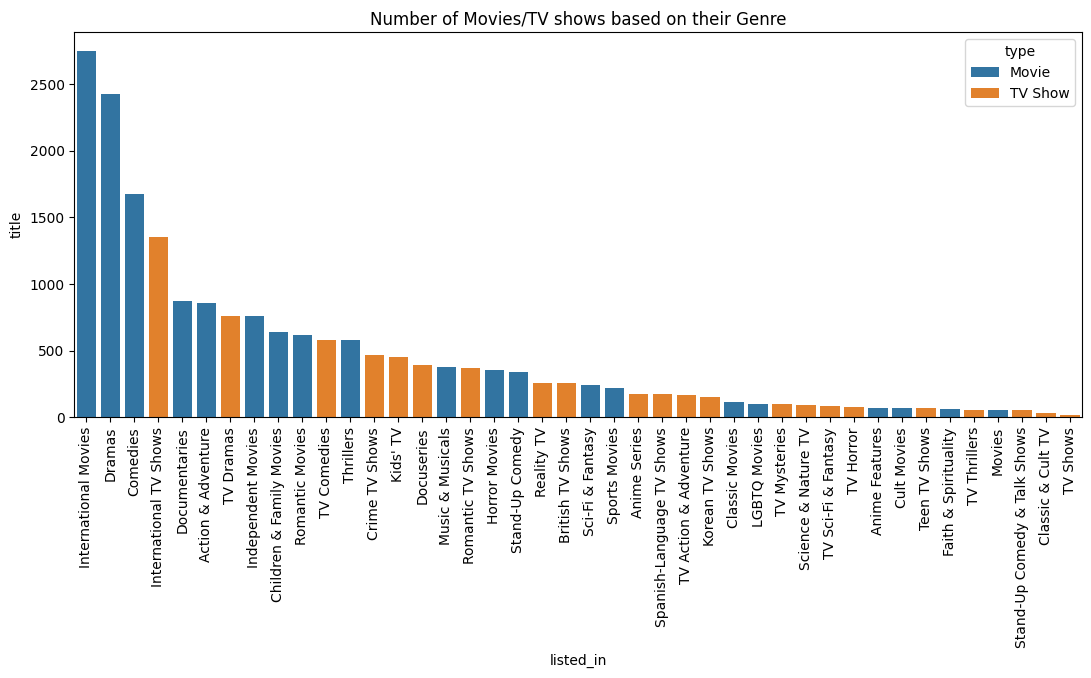

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(data=df_plot4,x='listed_in',y='title',hue='type')
plt.xticks(rotation=90)
plt.title("Number of Movies/TV shows based on their Genre")

In [ ]:
df_country_genre=df[df['country']!='Unknown Country']
df_country_genre=df_country_genre.groupby(['country','listed_in'])['title'].nunique()
df_country_genre
df_country_genre=df_country_genre.reset_index()

In [ ]:
df_country_genre.groupby('listed_in')['country'].max()

listed_in
Action & Adventure                    Vietnam
Anime Features                  United States
Anime Series                    United States
British TV Shows                United States
Children & Family Movies         West Germany
Classic & Cult TV               United States
Classic Movies                   West Germany
Comedies                             Zimbabwe
Crime TV Shows                  United States
Cult Movies                     United States
Documentaries                        Zimbabwe
Docuseries                            Uruguay
Dramas                                Vietnam
Faith & Spirituality             Vatican City
Horror Movies                    West Germany
Independent Movies                    Uruguay
International Movies                 Zimbabwe
International TV Shows           West Germany
Kids' TV                        United States
Korean TV Shows                 United States
LGBTQ Movies                    United States
Movies                  

In [ ]:
df_country_genre[df_country_genre['country'].isin(['United States','India','United Kingdom'])].sort_values(['title'],ascending=False).head(20)

,country,listed_in,title
526,India,International Movies,864
1351,United States,Dramas,835
1346,United States,Comedies,680
522,India,Dramas,662
1349,United States,Documentaries,511
1339,United States,Action & Adventure,404
1354,United States,Independent Movies,390
1343,United States,Children & Family Movies,390
517,India,Comedies,323
1380,United States,Thrillers,292


In [ ]:
df_plot5=df[df['cast']!='Unknown Actor']
df_plot5=df_plot5.groupby(['cast','type'])['title'].nunique().sort_values(ascending=False)
df_plot5=df_plot5.reset_index()
df_plot5

,cast,type,title
0,Anupam Kher,Movie,42
1,Shah Rukh Khan,Movie,35
2,Naseeruddin Shah,Movie,32
3,Om Puri,Movie,30
4,Akshay Kumar,Movie,30
...,...,...,...
40809,Jack Gilpin,Movie,1
40810,Jack Foley,Movie,1
40811,Jack Fisher,TV Show,1
40812,Jack Fisher,Movie,1


Text(0.5, 1.0, 'Top 40 Actors Based on Movies/TV shows')

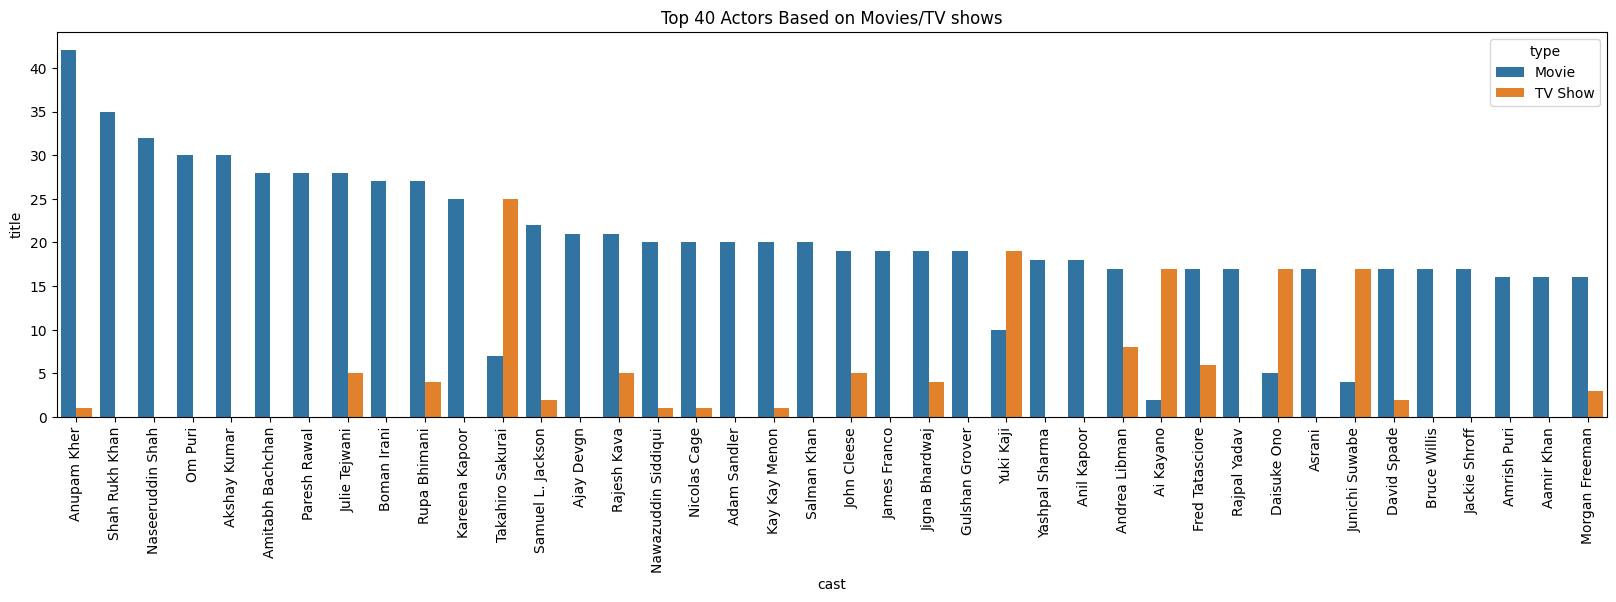

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(data=df_plot5,x='cast',y='title',hue='type',order=df_plot5['cast'][:40])
plt.xticks(rotation=90)
plt.title("Top 40 Actors Based on Movies/TV shows")

**Inference:**
The graph shows top Actors based on TV Shows/Movie  for top 40. The most popular Actors for Movie being Anupam Kher,Shahrukh Khan and Julie Tejwani.
The most popular actor for TV show is Takhiro Sakurai.


In [ ]:

df_plot6=df.groupby(['Year Added on Netflix','type'])['title'].nunique().sort_values(ascending=False)
df_plot6=df_plot6.reset_index()
df_plot6

,Year Added on Netflix,type,title
0,2019,Movie,1424
1,2020,Movie,1284
2,2018,Movie,1237
3,2021,Movie,993
4,2017,Movie,839
5,2020,TV Show,595
6,2019,TV Show,592
7,2021,TV Show,505
8,2018,TV Show,412
9,2017,TV Show,349


Text(0.5, 1.0, 'Count of number of movies/TV shows added per year')

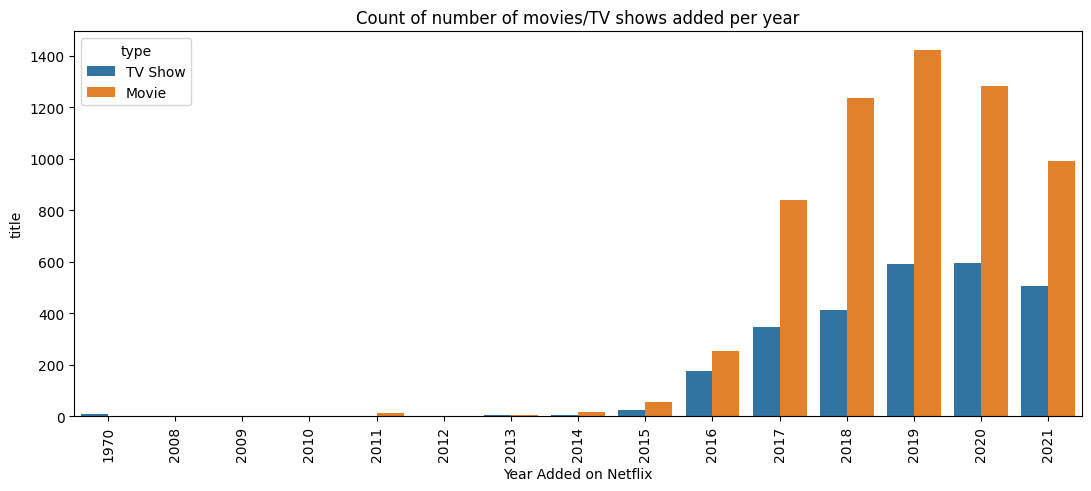

In [ ]:
plt.figure(figsize=(13,5))
sns.barplot(data=df_plot6,x='Year Added on Netflix',y='title',hue='type')
plt.xticks(rotation=90)
plt.title("Count of number of movies/TV shows added per year")

In [ ]:
df_plot7_movie=df[df['type']=='Movie']
df_plot7_movie=df_plot7_movie.groupby('Month Added on Netflix')['title'].nunique().sort_values(ascending=False)
df_plot7_movie=df_plot7_movie.reset_index()
df_plot7_movie

,Month Added on Netflix,title
0,7,565
1,4,550
2,12,547
3,1,546
4,10,545
5,3,529
6,8,519
7,9,519
8,11,498
9,6,492


Text(0.5, 1.0, 'Count of number of movies added per month')

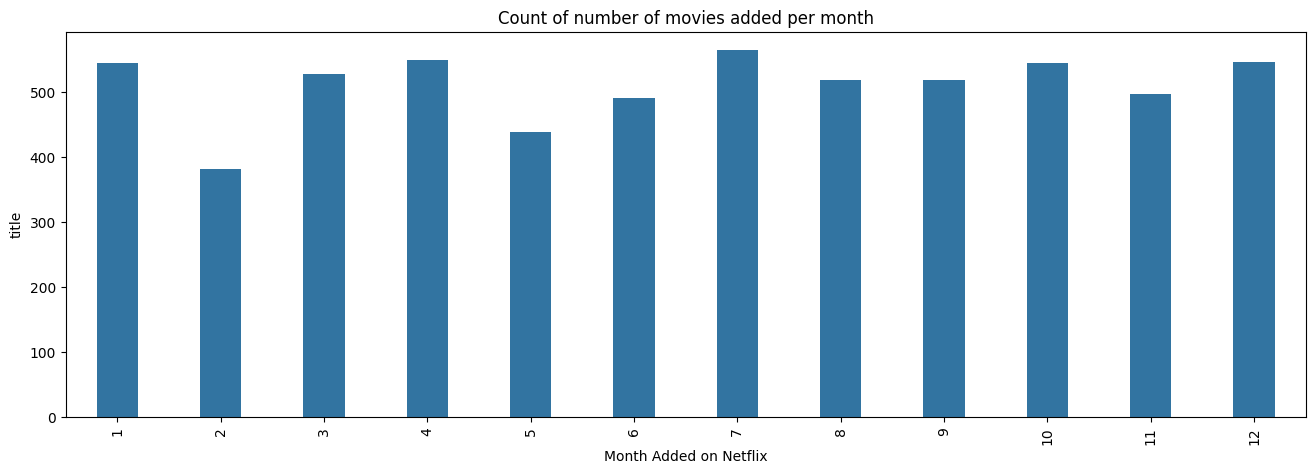

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(data=df_plot7_movie,x='Month Added on Netflix',y='title',width = 0.4)
plt.xticks(rotation=90)
plt.title("Count of number of movies added per month")

In [ ]:
df_plot10=df.groupby(['Month Added on Netflix','type'])['title'].nunique()
df_plot10=df_plot10.reset_index()
df_plot10

,Month Added on Netflix,type,title
0,1,Movie,546
1,1,TV Show,202
2,2,Movie,382
3,2,TV Show,181
4,3,Movie,529
5,3,TV Show,213
6,4,Movie,550
7,4,TV Show,214
8,5,Movie,439
9,5,TV Show,193


Text(0.5, 1.0, 'Count of number of movies/TV show added per month')

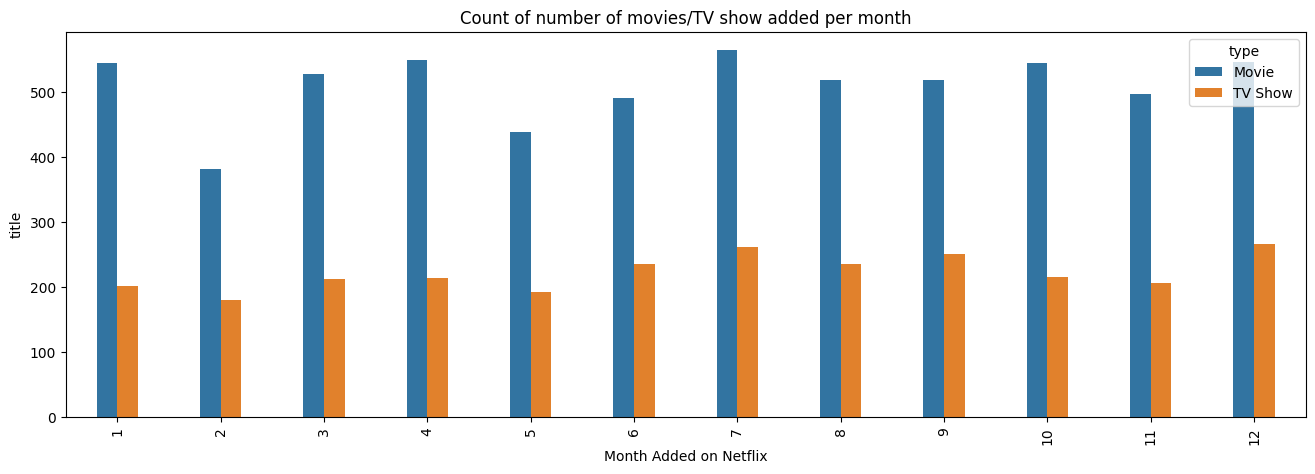

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(data=df_plot10,x='Month Added on Netflix',y='title',hue='type',width = 0.4)
plt.xticks(rotation=90)
plt.title("Count of number of movies/TV show added per month")

In [ ]:
df_plot7_TV=df[df['type']=='TV Show']
df_plot7_TV=df_plot7_TV.groupby('Month Added on Netflix')['title'].nunique().sort_values(ascending=False)
df_plot7_TV=df_plot7_TV.reset_index()
df_plot7_TV

,Month Added on Netflix,title
0,12,266
1,7,262
2,9,251
3,6,236
4,8,236
5,10,215
6,4,214
7,3,213
8,11,207
9,1,202


Text(0.5, 1.0, 'Count of number of TV shows added per month')

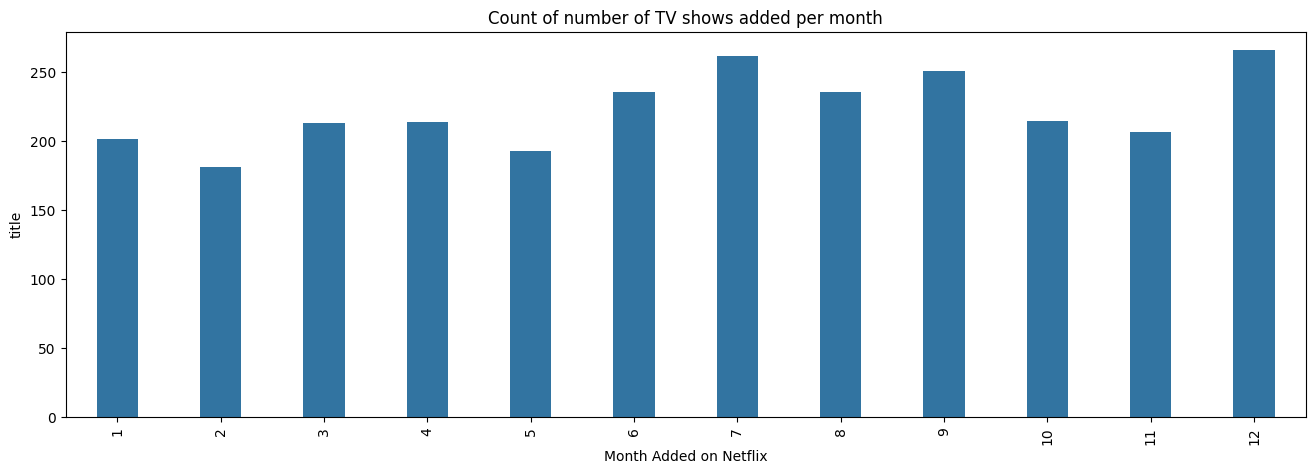

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(data=df_plot7_TV,x='Month Added on Netflix',y='title',width = 0.4)
plt.xticks(rotation=90)
plt.title("Count of number of TV shows added per month")

In [ ]:
df_plot8_movie=df[df['type']=='Movie']
df_plot8_movie=df_plot8_movie.groupby('Week Added on Netflix')['title'].nunique().sort_values(ascending=False)
df_plot8_movie=df_plot8_movie.reset_index()
df_plot8_movie

,Week Added on Netflix,title
0,1,316
1,44,243
2,40,215
3,9,207
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


In [ ]:
df_plot8_TV=df[df['type']=='TV Show']
df_plot8_TV=df_plot8_TV.groupby('Week Added on Netflix')['title'].nunique().sort_values(ascending=False)
df_plot8_TV=df_plot8_TV.reset_index()
df_plot8_TV

,Week Added on Netflix,title
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,5,73
7,26,73
8,40,72
9,50,70


In [ ]:
df.groupby('rating')['title'].nunique().sort_values(ascending=False)

rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown Rating       4
NC-17                3
UR                   3
74 min               1
84 min               1
66 min               1
Name: title, dtype: int64

In [ ]:
df_plot9=df.groupby(['rating','type'])['title'].nunique()
df_plot9=df_plot9.reset_index()
df_plot9

,rating,type,title
0,66 min,Movie,1
1,74 min,Movie,1
2,84 min,Movie,1
3,G,Movie,41
4,NC-17,Movie,3
5,NR,Movie,75
6,NR,TV Show,5
7,PG,Movie,287
8,PG-13,Movie,490
9,R,Movie,797


Text(0.5, 1.0, 'Rating of TV Show/Movies')

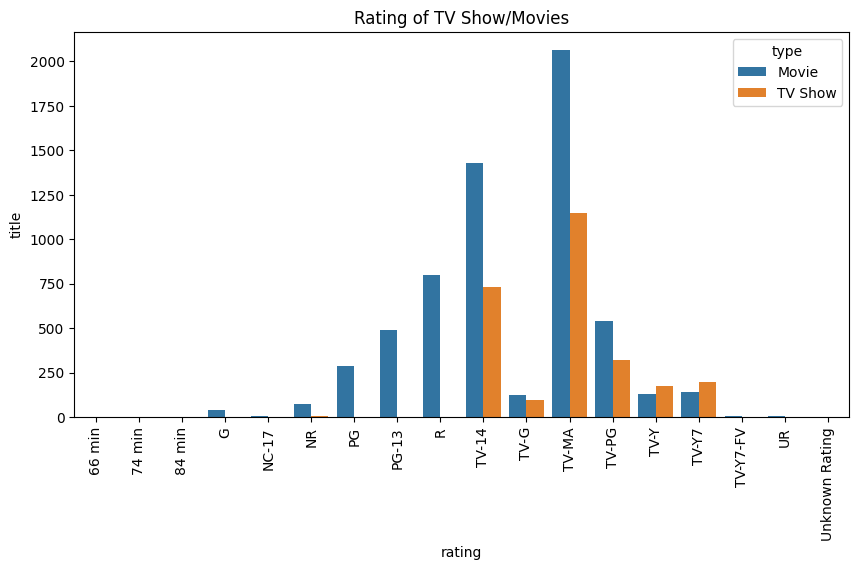

In [ ]:

plt.figure(figsize=(10,5))
sns.barplot(df_plot9,x='rating',y='title',hue='type')
plt.xticks(rotation=90)
plt.title("Rating of TV Show/Movies")

**Inference:**
Based on rating we can say maximum content released by Netflix has a rating TV-MA.
“TV-MA” is a rating assigned by the TV Parental Guidelines to a television program designed for mature audiences only.


In [ ]:
duration_df1=df.loc[df['type']=='Movie']
duration_df2=duration_df1[duration_df1['duration']!='Unknown Duration']
duration_df=duration_df2['duration'].apply(lambda x:x.split()[0]).astype(int)

Text(0.5, 1.0, 'Distribution of Duration of movies')

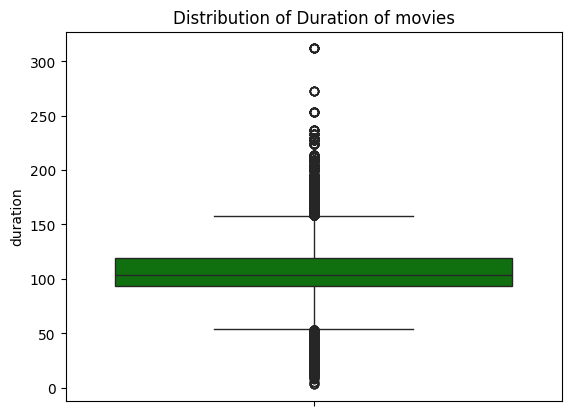

In [ ]:
sns.boxplot(duration_df,color='green')
plt.title("Distribution of Duration of movies")

In [ ]:
duration_df_1=df.loc[df['type']=='TV Show']
duration_df_2=duration_df_1[duration_df_1['duration']!='Unknown Duration']
duration_df_season=duration_df_2['duration'].apply(lambda x:x.split()[0]).astype(int)

Text(0.5, 1.0, 'Distribution of Number of Season in TV Show')

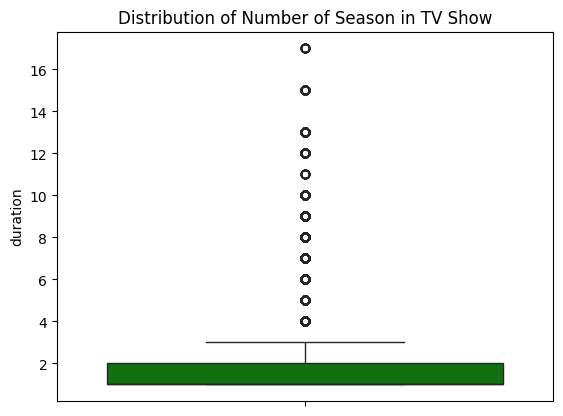

In [ ]:
sns.boxplot(duration_df_season,color='green')
plt.title("Distribution of Number of Season in TV Show")

**Inference:**
Considering the number of seasons of TV Shows the maximum TV shows were consisting of 1-2 seasons.


Text(0.5, 1.0, 'Distribution of Duration of movies')

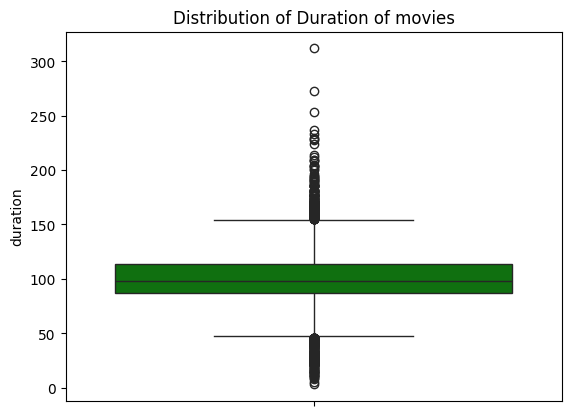

In [ ]:
dur_df=df_original.loc[df_original['duration'].str.contains('min')==True]['duration'].apply(lambda x:x.split()[0]).astype(int)
sns.boxplot(dur_df,color='green')
plt.title("Distribution of Duration of movies")

In [ ]:
year_df=df['Year Added on Netflix']
year_df

0       2021
1       2021
1       2021
1       2021
1       2021
        ... 
8806    2019
8806    2019
8806    2019
8806    2019
8806    2019
Name: Year Added on Netflix, Length: 201991, dtype: int64

Text(0.5, 1.0, 'Distribution of Year Added on Netflix')

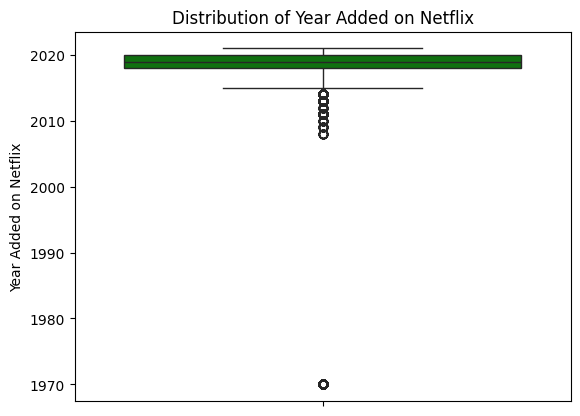

In [ ]:
sns.boxplot(year_df,color='green')
plt.title("Distribution of Year Added on Netflix")


**Inference:**
Considering from 1970 -2021 the maximum number of movies were added in Netflix in the year 2019.More content has been added since 2015. Also comparatively more number of movies were added. So focus of Netflix is on movies than  TV shows.


In [ ]:
df.groupby(['country','listed_in'])['title'].nunique().sort_values(ascending=False)

country        listed_in           
India          International Movies    864
United States  Dramas                  835
               Comedies                680
India          Dramas                  662
United States  Documentaries           511
                                      ... 
Mongolia       International Movies      1
Montenegro     Dramas                    1
               International Movies      1
Morocco        Action & Adventure        1
Zimbabwe       Romantic Movies           1
Name: title, Length: 1464, dtype: int64

In [ ]:
df.groupby(['country','type'])['title'].nunique().sort_values(ascending=False)

country          type   
United States    Movie      2751
India            Movie       962
United States    TV Show     938
United Kingdom   Movie       532
Unknown Country  Movie       440
                            ... 
Hungary          TV Show       1
Sri Lanka        Movie         1
Sudan            Movie         1
Panama           Movie         1
                 Movie         1
Name: title, Length: 190, dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Year Added on Netflix,Month Added on Netflix,Week Added on Netflix,Difference of dates
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,38,1
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,38,0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,9,38,0
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,9,38,0
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,9,38,0


**Business insights:**
We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:
The most content type on Netflix is movies,
The popular streaming platform started gaining traction after 2015. Since then, the amount of content added has been increasing significantly,
The country by the amount of the production of content is the United States,
The most popular director on Netflix , with the most titles, is Rajiv Chilaka.
International Movies is a genre that is mostly in Netflix,
The largest count of Netflix content is made with a TV-MA rating,
The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.
The most popular actor on Netflix movie, based on the number of titles, is Takhiro Sakurai.
The movies with 90-120 min duration is more popular and TV shows with 1-2 season.

**Recommendation:**
Based on the analysis the following recommendations are made:
•	Netflix should continue to focus on Movie and the genre ‘International Movies’.
•	They can add more movies in United States, India and United Kingdom.
•	They can add more TV shows in United States ,United Kingdom and Japan.
•	They can continue adding movies with rating TV-MA as it is popular.
•	They should select movies with duration within 90-120 min.
•	TV shows with 1-2 seasons will be popular.
•	The best month to release movies is July and  best week is for movies is 1st week of January.
•	The best month for TV show release is December and best week for tV show is 1st week of July.

